# ¿Qué vende un coche?

Soy un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en este sitio web cada día. Necesitamos estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

El objetivo principal de este análisis es identificar los factores que tienen la mayor influencia en el precio de los vehículos publicados en Crankshaft List. Al conocer estos factores, podremos proporcionar a nuestros usuarios información valiosa que les permita tomar decisiones más informadas y eficientes en el mercado de vehículos usados.

Además, este análisis también tiene como objetivo ayudar a los vendedores a establecer precios más competitivos para sus vehículos, lo que puede aumentar la probabilidad de que se vendan más rápido y a un precio justo.

En resumen, los objetivos principales de este análisis son:

1. Identificar los factores que más influyen en el precio de los vehículos en Crankshaft List.
2. Proporcionar información valiosa a los usuarios de nuestro sitio web para que puedan tomar decisiones informadas.
3. Ayudar a los vendedores a establecer precios más competitivos para sus vehículos y aumentar la probabilidad de venta.

## Inicialización

Carguemos las librerías que son necesarias para el proyecto. 

In [1]:
# Cargamos todas las librerías
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sb

from pandas.plotting import scatter_matrix

### Cargar datos

Carguemos los datos del proyecto y veamos la información general

In [2]:
# Cargamos el archivo de datos en un DataFrame
df = pd.read_csv('/datasets/vehicles_us.csv') 


### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina


In [3]:
# imprimos la información general/resumida sobre el DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# Veamos las estadísticas descriptivas de nuestros datos
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [5]:
# imprimimos una muestra de datos
df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


A primera impresión podemos observar que tenemos valores nulos (NaN), sobretodo en la columna **'is_4wd'**. Busquemos cuantos valores nulos tenemos en nuestro dataset. De ahí en mas, no podemos ver si existen duplicados o datos ingresados de manera incorrecta. Tendremos que buscar paso a paso.

In [6]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [7]:
porcentaje = (25953/51525) * 100
print(f'El porcentaje de los valores nulos de la columna is_4wd es de:', round(porcentaje, 2), '%')

El porcentaje de los valores nulos de la columna is_4wd es de: 50.37 %


En la columna **is_4wd** tenemos un total de 25953 valores nulos, lo cual es un numero bastante grande, ya que representa el 50.37 % del conjunto de datos. Probablemente estos vehiculos no sean 4x4 es decir, tienen valor 0. 

In [8]:
# Busquemos valores duplicados
df.duplicated().sum()

0

Vemos que el dataset **no cuenta con valores duplicados**, lo que hara nuestro análisis mas fácil

In [9]:
# Veamos el tipo de datos que contiene cada columna
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

Como podemos ver en el conjunto de datos, tenemos diferentes tipo de datos a los que tenemos que poner atención, por ejemplo; en la columna **model_year** indica que tenemos valores tipo float, cuando deberían ser de tipo int64.

Ahora busquemos valores duplicados con diferente sintaxis

In [10]:
df['model'].sort_values().unique()

array(['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade',
       'chevrolet camaro', 'chevrolet camaro lt coupe 2d',
       'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze',
       'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu',
       'chevrolet silverado', 'chevrolet silverado 1500',
       'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd',
       'chevrolet silverado 3500hd', 'chevrolet suburban',
       'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse',
       'chrysler 200', 'chrysler 300', 'chrysler town & country',
       'dodge charger', 'dodge dakota', 'dodge grand caravan',
       'ford econoline', 'ford edge', 'ford escape', 'ford expedition',
       'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd',
       'ford f-250 super duty', 'ford f-350 sd', 'ford f150',
       'ford f150 supercrew cab xlt', 'ford f250', 'ford f250 super duty',
       'ford f350', 'ford f350 super duty', 'ford focus', 'ford focus

In [11]:
df['transmission'].sort_values().unique()

array(['automatic', 'manual', 'other'], dtype=object)

In [12]:
df['condition'].sort_values().unique()

array(['excellent', 'fair', 'good', 'like new', 'new', 'salvage'],
      dtype=object)

In [13]:
df['type'].sort_values().unique()

array(['SUV', 'bus', 'convertible', 'coupe', 'hatchback', 'mini-van',
       'offroad', 'other', 'pickup', 'sedan', 'truck', 'van', 'wagon'],
      dtype=object)

### Conclusiones y siguientes pasos

Podemos ver que las siguientes columnas: **'model_year', 'cylinders', 'odometer', 'paint_color', 'is_4wd' tienen valores nulos** que tendremos que tratar después de concluir la razón por la cual son nulos, es decir, tenemos que buscar una relación entre estos valores. A primera vista no parecen tener relación directa por las cantidades que se muestran en cada fila. Tengamos en cuenta que la columna que mas valores nulos tiene es **'is_4wd'**, como lo esperabamos.

Investigamos acerca del tipo de transmisiones que existen y encontramos; **automatica, manual, CVT, y automatizada o secuencial**. Esperemos que 'other' en nuestra columna **transmission** se refiera a alguna de estas opciones.

En la columna **'date_posted'** nos devuelve que tenemos datos tipo booleanos, los cuales tendremos que tratar mediante **datetime**. La columna **model_year** devuelve datos tipo decimales, tendremos que cambiarlos a enteros, al igual que en las columnas **cylinders** y **is_4wd**. Estos datos los trataremos en la parte de **Corrección de tipos de datos**.

## Tratar los valores ausentes (si hay)

Estudiemos los valores ausentes para cada columna en más detalle.

In [14]:
nan_model = df['model_year'].isna().sum()

In [15]:
perc_model = nan_model/len(df) * 100
print(f'El porcentaje de los valores nulos de la columna model_year es de:', round(perc_model, 2), '%')

El porcentaje de los valores nulos de la columna model_year es de: 7.02 %


In [16]:
# Calculamos la mediana imputando con la columna 'model' para rellenar valores nulos 
model_year_median = df.groupby('model')['model_year'].transform('median')

In [17]:
df['model_year'].fillna(model_year_median, inplace=True)

Como el porcentaje de estos valores nulos es **menor del 10 %** del conjunto de datos, podríamos deshacernos de ellos, pero decidimos rellenar estos valores con la mediana de la imputación de las columnas **'model'** y **'model_year'**

In [18]:
nan_cyl = df['cylinders'].isna().sum()

In [19]:
perc_cyl = nan_cyl/len(df) * 100
print(f'El porcentaje de los valores nulos de la columna cylinders es de:', round(perc_cyl, 2), '%')

El porcentaje de los valores nulos de la columna cylinders es de: 10.21 %


In [20]:
# Calculamos la mediana imputando con la columna 'model' para rellenar valores nulos 
cylinders_median = df.groupby('model')['cylinders'].transform('median')

In [21]:
df['cylinders'].fillna(cylinders_median, inplace=True)

Decidimos rellenar estos valores con la mediana de la imputación de las columnas **'model'** y **'model_year'**

In [22]:
nan_paint = df['paint_color'].isna().sum()

In [23]:
perc_paint = nan_paint/len(df) * 100
print(f'El porcentaje de los valores nulos de la columna cylinders es de:', round(perc_paint, 2), '%')

El porcentaje de los valores nulos de la columna cylinders es de: 17.99 %


In [24]:
nan_odo = df['odometer'].isna().sum()

In [25]:
perc_odo = nan_odo/len(df) * 100
print(f'El porcentaje de los valores nulos de la columna cylinders es de:', round(perc_odo, 2), '%')

El porcentaje de los valores nulos de la columna cylinders es de: 15.32 %


Podemos ver que los valores nulos de las columnas **paint_color y odometer** superan el total del conjunto de datos por mucho, por lo que tendremos que tratarlos. Para la columna **paint_color** podemos crear una categoria extra, ya que nos será imposible utilizar una medida por tratarse de valores booleanos. Para la columna **odometer** podemos utilizar la media o mediana, segun nos indiquen los datos.

Como ya vimos las unicas columnas de las que podemos deshacernos, ahora si podemos continuar con los datos mencionados antes.

In [26]:
print(df['cylinders'].isna().sum())
print(df['model_year'].isna().sum())

0
0


Ahora tratemos los valores de la columna **'is_4wd'** como lo hemos mencionado (hacemos referencia a la misma columna para hacer el cambio permanente.)

In [27]:
df['is_4wd'] = df['is_4wd'].fillna(0)

In [28]:
df['is_4wd'].isna().sum()

0

Tratemos la columna **'paint_color'** creando otra categoria

In [29]:
df['paint_color'] = df['paint_color'].fillna('other')

In [30]:
df['paint_color'].isna().sum()

0

Solamente nos falta tratar los valores de la columna **'odometer'** para poder tener nuestro dataset más limpio, hagamos una imputación basada en 'condition' para obtener la media y rellenar esos valores ausentes

In [31]:
# Calculamos la mediana imputando con la columna 'condition' para rellenar valores nulos 
odo_median = df.groupby('condition')['odometer'].transform('median')

In [32]:
df['odometer'].fillna(odo_median, inplace=True)

Listo, tratamos los valores ausentes en las columnas de nuestro dataframe

In [33]:
df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

## Corregir los tipos de datos

Cambiamos los tipos de datos que tenemos en el dataframe para tener un dataset mas limpio y accesible.

In [34]:
df['date_posted'] = pd.to_datetime(df['date_posted'] , format = '%Y-%m-%d')

df['model_year'] = df['model_year'].astype('int64')
df['cylinders'] = df['cylinders'].astype('int64')
df['is_4wd'] = df['is_4wd'].astype(bool)

In [35]:
df.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
dtype: object

## Enriquecer datos

Agreguemos factores adicionales a los datos para facilitar el análisis.

In [36]:
# Agreguemos valores de fecha y hora para cuando se colocó el anuncio
df['year_posted'] = df['date_posted'].dt.year
df['month_posted'] = df['date_posted'].dt.month
df['day_posted'] = df['date_posted'].dt.weekday

In [37]:
# Agreguemos los años del vehículo cuando el anuncio se colocó
df['years_old'] = 1 + df['year_posted'] - df['model_year']


Le sumamos el valor de 1 a esta operación para no provocar indefiniciones matemáticas en la división a continuación

In [38]:
# Agreguemos el millaje promedio del vehículo por año
df['miles_per_year'] = df['odometer'] / df['years_old']


In [39]:
df.dtypes

price                      int64
model_year                 int64
model                     object
condition                 object
cylinders                  int64
fuel                      object
odometer                 float64
transmission              object
type                      object
paint_color               object
is_4wd                      bool
date_posted       datetime64[ns]
days_listed                int64
year_posted                int64
month_posted               int64
day_posted                 int64
years_old                  int64
miles_per_year           float64
dtype: object

In [40]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente
df['condition'].unique()



array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [41]:
conditions = {
    'salvage': 1,
    'fair': 2,
    'good': 3,
    'excellent': 4,
    'like new': 5,
    'new': 6,
}

In [42]:
df['condition'] = df['condition'].replace(conditions)

In [43]:
df.dtypes

price                      int64
model_year                 int64
model                     object
condition                  int64
cylinders                  int64
fuel                      object
odometer                 float64
transmission              object
type                      object
paint_color               object
is_4wd                      bool
date_posted       datetime64[ns]
days_listed                int64
year_posted                int64
month_posted               int64
day_posted                 int64
years_old                  int64
miles_per_year           float64
dtype: object

## Comprobar datos limpios

Los datos parecen estar listos para nuestro análisis. Veamos la información general de nuestro Dataframe.

In [44]:
# imprimimos la información general/resumida sobre el DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51525 non-null  int64         
 1   model_year      51525 non-null  int64         
 2   model           51525 non-null  object        
 3   condition       51525 non-null  int64         
 4   cylinders       51525 non-null  int64         
 5   fuel            51525 non-null  object        
 6   odometer        51525 non-null  float64       
 7   transmission    51525 non-null  object        
 8   type            51525 non-null  object        
 9   paint_color     51525 non-null  object        
 10  is_4wd          51525 non-null  bool          
 11  date_posted     51525 non-null  datetime64[ns]
 12  days_listed     51525 non-null  int64         
 13  year_posted     51525 non-null  int64         
 14  month_posted    51525 non-null  int64         
 15  da

In [45]:
# imprimimos una muestra de datos
df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,years_old,miles_per_year
0,9400,2011,bmw x5,3,6,gas,145000.0,automatic,SUV,other,True,2018-06-23,19,2018,6,5,8,18125.000000
1,25500,2011,ford f-150,3,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2018,10,4,8,11088.125000
2,5500,2013,hyundai sonata,5,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019,2,3,7,15714.285714
3,1500,2003,ford f-150,2,8,gas,181613.0,automatic,pickup,other,False,2019-03-22,9,2019,3,4,17,10683.117647
4,14900,2017,chrysler 200,4,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2019,4,1,3,26967.666667


## Estudiar parámetros principales

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51525 non-null  int64         
 1   model_year      51525 non-null  int64         
 2   model           51525 non-null  object        
 3   condition       51525 non-null  int64         
 4   cylinders       51525 non-null  int64         
 5   fuel            51525 non-null  object        
 6   odometer        51525 non-null  float64       
 7   transmission    51525 non-null  object        
 8   type            51525 non-null  object        
 9   paint_color     51525 non-null  object        
 10  is_4wd          51525 non-null  bool          
 11  date_posted     51525 non-null  datetime64[ns]
 12  days_listed     51525 non-null  int64         
 13  year_posted     51525 non-null  int64         
 14  month_posted    51525 non-null  int64         
 15  da

In [47]:
# Veamos la relación entre estas variables
df[['price', 'years_old', 'odometer', 'cylinders', 'condition']].corr()


,price,years_old,odometer,cylinders,condition
price,1.000000,-0.411694,-0.393550,0.300342,0.221518
years_old,-0.411694,1.000000,0.433983,0.147765,-0.268812
odometer,-0.393550,0.433983,1.000000,0.085719,-0.322576
cylinders,0.300342,0.147765,0.085719,1.000000,-0.065661
condition,0.221518,-0.268812,-0.322576,-0.065661,1.000000


In [48]:
# Definimos las columnas que queremos graficar
columns = ['price', 'model_year', 'odometer', 'cylinders', 'condition']

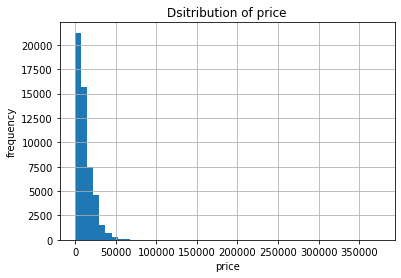

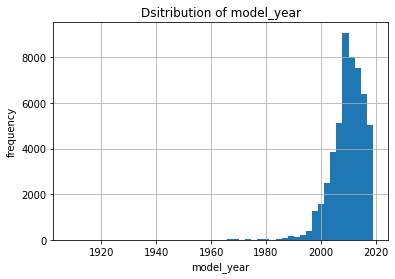

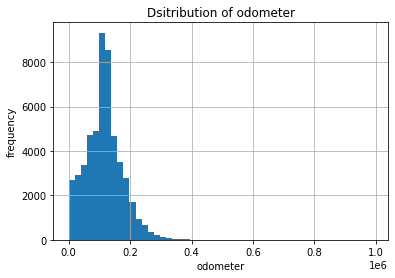

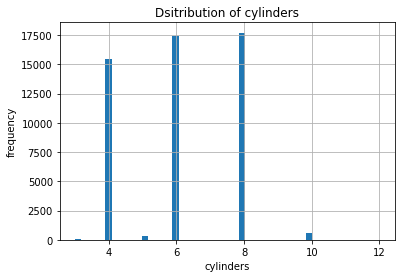

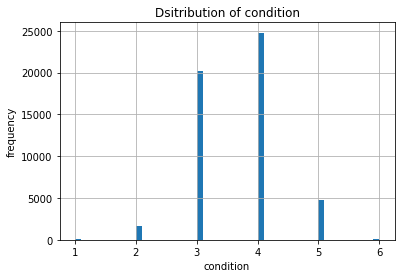

In [49]:
# Definimos una función que grafique un histograma de cada columna
def plot_histogram(column):
    df.hist(column, bins=50)
    plt.title(f'Dsitribution of {column}')
    plt.xlabel(column)
    plt.ylabel('frequency')
    plt.show()
    
for col in columns:
    plot_histogram(col)

Ahora veamos diagramas de caja

In [50]:
# Definimos las columnas que queremos graficar con diagramas de caja
columns_box = ['price', 'model_year', 'odometer']

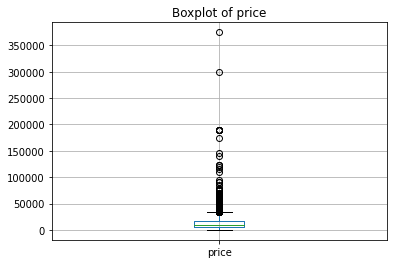

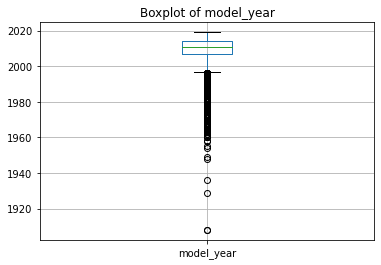

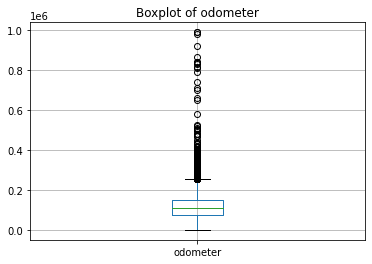

In [51]:
# Iteramos sobre las columnas y creamos diagramas de caja para cada columna
for col in columns_box:
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

Aquí podemos ver que en el número de cilindros y el estado de los vehiculos, no tenemos valores atípicos. En las columnas restantes si los hay.

## Estudiar y tratar valores atípicos
Determinemos que columnas pueden contener valores atípicos y tratarlos para mostrar gráficos sin contemplar estos valores atípicos.

In [52]:
# Definamos una función que calcule los límites para cada columna
def calculate_limits(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

columns = ['price', 'model_year', 'odometer']

# Almacenamos los datos sin valores atípicos en un dataframe separado
df_filtered = df

for col in columns:
    lower, upper = calculate_limits(col)
    df_filtered = df_filtered[(df_filtered[col] >= lower) & (df_filtered[col] <= upper)]
    print(f'Lower limit for {col}: {lower:.2f}')
    print(f'Upper limit for {col}: {upper:.2f}')

Lower limit for price: -12758.50
Upper limit for price: 34597.50
Lower limit for model_year: 1996.50
Upper limit for model_year: 2024.50
Lower limit for odometer: -32561.50
Upper limit for odometer: 256050.50


In [53]:
# Ahora mostremos los valores mas pequeños de la columna 'price' para ver si la función realmente funciona
df_filtered.sort_values('price').head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,years_old,miles_per_year
16752,1,2018,ford f-150,4,6,gas,17269.0,automatic,truck,silver,False,2019-01-09,87,2019,1,2,2,8634.500000
23811,1,2007,chevrolet tahoe,5,8,gas,1.0,automatic,SUV,blue,False,2018-07-02,47,2018,7,0,12,0.083333
11533,1,2019,dodge charger,4,6,gas,104230.0,automatic,sedan,white,True,2019-01-22,47,2019,1,1,1,104230.000000
30785,1,2018,chevrolet silverado 1500,4,8,gas,104230.0,automatic,truck,white,True,2018-05-11,26,2018,5,4,1,104230.000000
11760,1,2017,dodge charger,4,8,gas,104230.0,automatic,sedan,red,False,2018-06-18,50,2018,6,0,2,52115.000000


## Estudiar parámetros principales sin valores atípicos

Utilicemos los datos filtrados para crear nuevos histogramas y poder compararlos con los histogramas anteriores (aquellos con valores atípicos incluidos).

Text(0, 0.5, 'frequency')

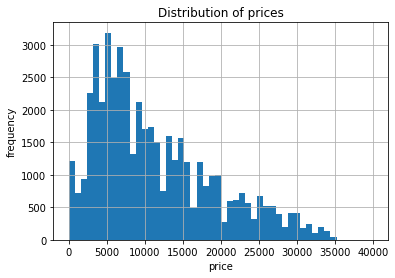

In [54]:
df_filtered.hist('price', bins=50, range=(0, 40000))
plt.title('Distribution of prices')
plt.xlabel('price')
plt.ylabel('frequency')

Podemos observar que en el histrograma de la columna 'price' tenemos una distribución sesgada hacia la derecha, antes y después de filtrar, con una mayor concentración de los datos en bajos precios. Sin embargo,  despues de filtrar los datos, la concentración de vehículos de menos precio es mayor, lo que nos indica que los **valores atípicos eran mayormente vehículos de mayor precio.**

Text(0, 0.5, 'frequency')

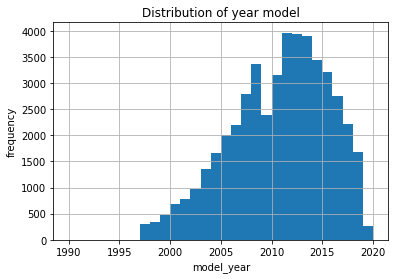

In [55]:
df_filtered.hist('model_year', bins=30, range=(1990, 2020))
plt.title('Distribution of year model')
plt.xlabel('model_year')
plt.ylabel('frequency')

Podemos observar que en el histrograma de la columna 'model_year' la distribución está sesgada hacia la izquiera, esto quiere decir que hay mayor concentración de vehiculos recientes. Al filtrar los datos nos dimos cuenta que la gráfica es muy similar, solamente se acorto la cola. Esto nos indica que los **valores atípicos** de esta columna no eran ni vehículos muy viejos, ni muy nuevos. **Estaban distribuidos aleatoriamente.**

Text(0, 0.5, 'frequency')

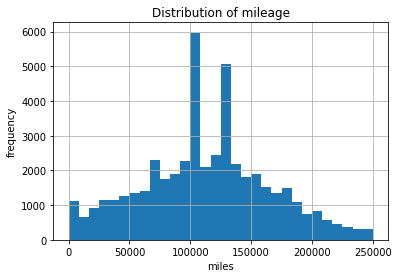

In [56]:
df_filtered.hist('odometer', bins=30, range=(0, 250000))
plt.title('Distribution of mileage')
plt.xlabel('miles')
plt.ylabel('frequency')

Podemos observar que en el histrograma de la columna 'odometer' la distribución está sesgada levemente hacia la derecha, esto quiere decir que hay mayor concentración de vehiculos con un millaje promedio cerca de las 100,000 millas. Al filtrar los datos nos dimos cuenta que la gráfica es muy similar, solamente se acorto la cola. Esto nos indica que los **valores atípicos** de esta columna no eran ni vehículos con mucho millaje, ni vehículos con poco millaje.

## Periodo de colocación de los anuncios

Podemos observar que en el histrograma de la columna 'model_year' la distribución está sesgada hacia la derecha, con una mayor concentración de vehículos con menor distancia recorrida. Después de filtrar los datos, la gráfica se acorto de valores altos en distancias recorridas, lo que nos indica que los **valores atípicos de esta columna estaban distribuidos en altos valores de distancia recorrida**.

Primero veamos la información y disrtibución de los datos de la columna **'days_listed'**

In [57]:
df_filtered['days_listed'].describe()

count    47869.000000
mean        39.543191
std         28.208523
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Text(0, 0.5, 'ads')

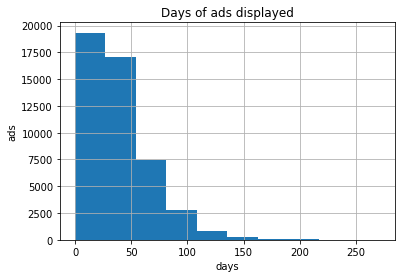

In [58]:
df_filtered['days_listed'].hist()
plt.title('Days of ads displayed')
plt.xlabel('days')
plt.ylabel('ads')

In [59]:
media_ads = df_filtered['days_listed'].mean()
median_ads = df_filtered['days_listed'].median()
print(f'La media de anuncions mostrados es', media_ads)
print(f'La mediana de anuncions mostrados es', median_ads)

La media de anuncions mostrados es 39.54319079153523
La mediana de anuncions mostrados es 33.0


Podemos ver que el tiempo promedio que un anuncio es mostrado por vehículo es de un poco mas de un mes. Al mismo tiempo podemos ver que tenemos casos en los que los anuncios no duran ni siquiera un día y al contrario, tenemos anuncions que han sido mostrados por mas de 270 días.

Veamos los anuncios que fueron **eliminados rapidamente.** Estos serán filtrados con una duración máxima de 33 días, que es la mediana.

In [60]:
quick_ads = df_filtered[df_filtered['days_listed'] < median_ads]
quick_ads

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,years_old,miles_per_year
0,9400,2011,bmw x5,3,6,gas,145000.0,automatic,SUV,other,True,2018-06-23,19,2018,6,5,8,18125.000000
3,1500,2003,ford f-150,2,8,gas,181613.0,automatic,pickup,other,False,2019-03-22,9,2019,3,4,17,10683.117647
4,14900,2017,chrysler 200,4,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2019,4,1,3,26967.666667
5,14990,2014,chrysler 300,4,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2018,6,2,5,11590.800000
8,11500,2012,kia sorento,4,4,gas,104174.0,automatic,SUV,other,True,2018-07-16,19,2018,7,0,7,14882.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51509,5980,2010,subaru impreza,4,4,gas,121778.0,manual,hatchback,white,True,2019-01-10,8,2019,1,3,10,12177.800000
51513,17999,2014,ram 1500,5,8,gas,154000.0,automatic,pickup,white,True,2018-06-21,11,2018,6,3,5,30800.000000
51521,2700,2002,honda civic,1,4,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,2018,11,2,17,10676.470588
51522,3950,2009,hyundai sonata,4,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,2018,11,3,10,12800.000000


In [61]:
quick_ads.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year_posted,month_posted,day_posted,years_old,miles_per_year
price,1.000000,0.509240,0.187483,0.310204,-0.407449,0.334142,-0.001080,0.011779,-0.014189,-0.002401,-0.505930,0.190203
model_year,0.509240,1.000000,0.270374,-0.152636,-0.537291,-0.018151,-0.006646,0.001377,-0.008965,0.003519,-0.995551,0.469488
condition,0.187483,0.270374,1.000000,-0.079993,-0.303449,0.002558,-0.004587,0.004231,-0.000870,0.003344,-0.268807,0.026074
cylinders,0.310204,-0.152636,-0.079993,1.000000,0.114145,0.416513,0.005811,0.002232,0.000032,-0.000034,0.152187,-0.042638
odometer,-0.407449,-0.537291,-0.303449,0.114145,1.000000,0.049788,0.003427,-0.005638,0.010490,0.002399,0.534439,0.172803
is_4wd,0.334142,-0.018151,0.002558,0.416513,0.049788,1.000000,0.004149,-0.001846,0.004713,0.000086,0.017899,0.025288
days_listed,-0.001080,-0.006646,-0.004587,0.005811,0.003427,0.004149,1.000000,0.008679,-0.006702,0.007398,0.007435,-0.004254
year_posted,0.011779,0.001377,0.004231,0.002232,-0.005638,-0.001846,0.008679,1.000000,-0.819459,-0.015442,0.092853,-0.113915
month_posted,-0.014189,-0.008965,-0.000870,0.000032,0.010490,0.004713,-0.006702,-0.819459,1.000000,0.015593,-0.068288,0.093388
day_posted,-0.002401,0.003519,0.003344,-0.000034,0.002399,0.000086,0.007398,-0.015442,0.015593,1.000000,-0.004959,0.001465


Podemos ver en la columna **'days_listed'** que no tenemos relación alguna con cualquier otra variable de nuestro dataframe, por lo que nos hace concluir que simplemente esos vehiculos se publicaron en el momento adecuado. 

In [62]:
longer_ads = df_filtered[df_filtered['days_listed'] > media_ads]
longer_ads

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,years_old,miles_per_year
1,25500,2011,ford f-150,3,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2018,10,4,8,11088.125000
2,5500,2013,hyundai sonata,5,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019,2,3,7,15714.285714
6,12990,2015,toyota camry,4,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,2018,12,3,4,19803.000000
7,15990,2013,honda pilot,4,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,2019,1,0,7,15639.000000
15,17990,2013,ram 1500,4,8,gas,104230.0,automatic,pickup,red,True,2018-05-15,111,2018,5,1,6,17371.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51516,8999,2011,jeep grand cherokee,3,6,gas,129000.0,automatic,SUV,white,True,2018-11-01,51,2018,11,3,8,16125.000000
51517,11000,2012,dodge charger,4,8,gas,81000.0,automatic,sedan,black,False,2019-04-19,44,2019,4,4,8,10125.000000
51518,3750,2005,ford taurus,4,6,gas,110200.0,automatic,sedan,silver,False,2018-08-10,63,2018,8,4,14,7871.428571
51519,11750,2015,honda accord,4,4,gas,104230.0,automatic,coupe,other,False,2018-11-24,89,2018,11,5,4,26057.500000


In [63]:
longer_ads.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year_posted,month_posted,day_posted,years_old,miles_per_year
price,1.000000,0.513754,0.173662,0.319723,-0.405194,0.337290,-0.003489,-0.004272,0.001422,0.000131,-0.512655,0.203176
model_year,0.513754,1.000000,0.257683,-0.144088,-0.529693,-0.015424,0.003340,0.016955,-0.014400,-0.003939,-0.995453,0.469793
condition,0.173662,0.257683,1.000000,-0.079689,-0.293902,0.002043,0.004039,-0.001000,0.001743,0.004125,-0.257023,0.012304
cylinders,0.319723,-0.144088,-0.079689,1.000000,0.106415,0.410942,-0.002261,-0.001001,-0.000576,-0.014836,0.143570,-0.034739
odometer,-0.405194,-0.529693,-0.293902,0.106415,1.000000,0.058436,0.005745,-0.002874,0.007929,-0.000384,0.527866,0.184030
is_4wd,0.337290,-0.015424,0.002043,0.410942,0.058436,1.000000,-0.007605,-0.000092,-0.002049,0.003541,0.015370,0.040982
days_listed,-0.003489,0.003340,0.004039,-0.002261,0.005745,-0.007605,1.000000,0.012449,-0.006328,0.000956,-0.002144,0.008923
year_posted,-0.004272,0.016955,-0.001000,-0.001001,-0.002874,-0.000092,0.012449,1.000000,-0.817307,0.004856,0.078365,-0.100044
month_posted,0.001422,-0.014400,0.001743,-0.000576,0.007929,-0.002049,-0.006328,-0.817307,1.000000,-0.007235,-0.063508,0.082579
day_posted,0.000131,-0.003939,0.004125,-0.014836,-0.000384,0.003541,0.000956,0.004856,-0.007235,1.000000,0.004390,-0.000249


Podemos ver en la columna **'days_listed'** que no tenemos relación alguna con cualquier otra variable de nuestro dataframe, por lo que nos hace concluir que simplemente no existe mucho interes en general de esos vehiculos. 

Ahora busquemos la duración de los anuncios **anormalmente rápidos** utilizando la desviación estándar 

In [64]:
std_ads = df_filtered['days_listed'].std()

In [65]:
quicker_ads = df_filtered[df_filtered['days_listed'] < media_ads - std_ads]

In [66]:
quicker_ads

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,years_old,miles_per_year
3,1500,2003,ford f-150,2,8,gas,181613.0,automatic,pickup,other,False,2019-03-22,9,2019,3,4,17,10683.117647
21,5250,2007,toyota rav4,3,6,gas,154000.0,automatic,SUV,other,False,2018-08-22,8,2018,8,2,12,12833.333333
32,9499,2015,nissan altima,5,4,gas,51848.0,automatic,sedan,grey,False,2018-11-12,7,2018,11,0,4,12962.000000
39,8000,2009,ford f-150,3,8,gas,234000.0,automatic,truck,black,True,2019-03-31,1,2019,3,6,11,21272.727273
43,5100,2008,honda cr-v,4,4,gas,188000.0,automatic,SUV,red,True,2018-11-18,10,2018,11,6,11,17090.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51495,9500,2012,chevrolet traverse,3,6,gas,144500.0,automatic,SUV,other,True,2019-03-05,1,2019,3,1,8,18062.500000
51504,20481,2018,toyota camry,5,4,gas,38590.0,automatic,sedan,silver,False,2018-12-06,4,2018,12,3,1,38590.000000
51509,5980,2010,subaru impreza,4,4,gas,121778.0,manual,hatchback,white,True,2019-01-10,8,2019,1,3,10,12177.800000
51513,17999,2014,ram 1500,5,8,gas,154000.0,automatic,pickup,white,True,2018-06-21,11,2018,6,3,5,30800.000000


Ahora busquemos la duración de los anuncios **anormalmente lentos** utilizando la desviación estándar

In [67]:
slow_ads = df_filtered[df_filtered['days_listed'] > media_ads + std_ads]

In [68]:
slow_ads

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,years_old,miles_per_year
2,5500,2013,hyundai sonata,5,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019,2,3,7,15714.285714
6,12990,2015,toyota camry,4,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,2018,12,3,4,19803.000000
7,15990,2013,honda pilot,4,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,2019,1,0,7,15639.000000
15,17990,2013,ram 1500,4,8,gas,104230.0,automatic,pickup,red,True,2018-05-15,111,2018,5,1,6,17371.666667
28,29800,2012,chevrolet corvette,4,8,gas,57413.0,automatic,coupe,orange,False,2018-10-22,101,2018,10,0,7,8201.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011,gmc sierra 1500,4,8,gas,104230.0,automatic,truck,other,True,2019-01-25,69,2019,1,4,9,11581.111111
51502,7995,2011,chevrolet equinox,5,4,gas,111088.0,automatic,SUV,other,False,2019-04-01,175,2019,4,0,9,12343.111111
51503,6595,2011,chevrolet malibu,4,4,gas,100780.0,automatic,sedan,other,False,2019-02-27,73,2019,2,2,9,11197.777778
51519,11750,2015,honda accord,4,4,gas,104230.0,automatic,coupe,other,False,2018-11-24,89,2018,11,5,4,26057.500000


Veamos la diferencia entre nuestros valores calculados:

1. Anuncios rápidos: 98805
2. Anuncios anormalmente rápidos: 24364
3. Anuncios lentos: 82075
4. Anuncios anormalmente lentos: 29540

## Precio promedio por cada tipo de vehículo

Analicemos el número de anuncios y el precio promedio para cada tipo de vehículo.

In [69]:
grouped_type = df_filtered.groupby('type')

count_type = grouped_type['price'].count()
media_price = grouped_type['price'].mean()

print('Número de anuncios por cada tipo de vehículo')
print(count_type.sort_values(ascending=False))
print('-'*30)
print('Precio promedio por cada tipo de vehículo')
print(media_price.sort_values(ascending=False))

Número de anuncios por cada tipo de vehículo
type
sedan          11973
SUV            11803
truck          10964
pickup          6174
coupe           1974
wagon           1498
mini-van        1140
hatchback       1004
van              578
convertible      332
other            232
offroad          176
bus               21
Name: price, dtype: int64
------------------------------
Precio promedio por cada tipo de vehículo
type
bus            18107.428571
truck          15254.015505
pickup         15243.399417
offroad        14626.517045
coupe          13701.340426
convertible    13195.617470
other          10578.956897
SUV            10510.221723
wagon           9002.680908
van             8889.480969
mini-van        8078.740351
sedan           6993.489435
hatchback       6842.271912
Name: price, dtype: float64


Text(0, 0.5, 'Number of ads')

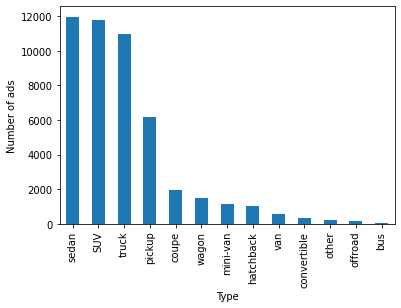

In [70]:
count_type_sorted = count_type.sort_values(ascending=False)
count_type_sorted.plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Number of ads')

Con estos datos podemos ver que los **Sedan** y las **SUV** son los vehículos con mas anuncions publicados

## Factores de precio

Filtremos nuestros datos para seleccionar solamente los tipo 'sedan' y 'suv' para buscar la relación que tienen los precios con la edad, millaje y condición.

In [71]:
df_price = df_filtered[(df_filtered['type'] == 'sedan') | (df_filtered['type'] == 'SUV')]

In [72]:
values = ['price', 'model_year', 'odometer', 'condition', 'type']
sedan_suv_data = df_price[values]

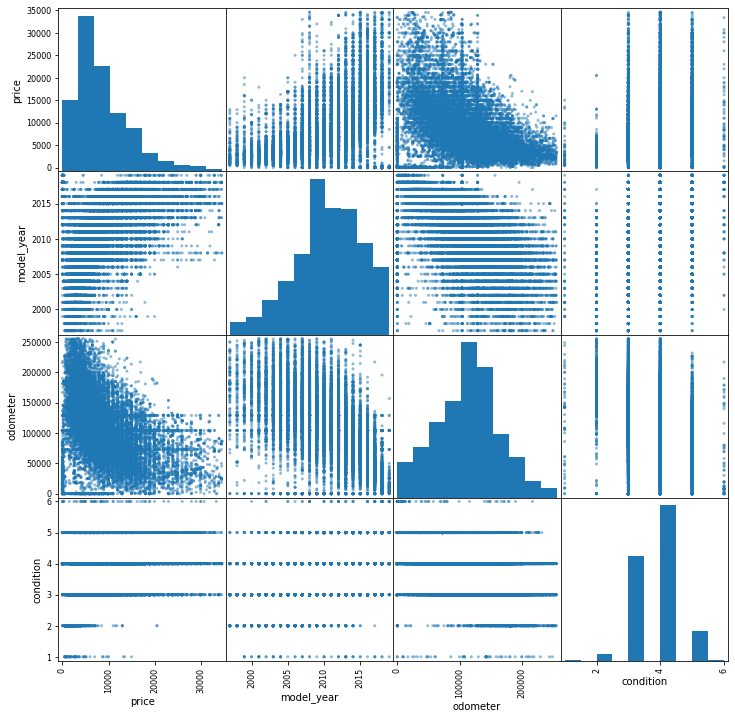

In [73]:
scatter_matrix(sedan_suv_data, figsize=(12, 12), diagonal='hist')
plt.show()

In [74]:
corr_matrix = df_price[['price', 'model_year', 'odometer', 'condition']].corr()
corr_matrix

,price,model_year,odometer,condition
price,1.000000,0.518711,-0.432365,0.245928
model_year,0.518711,1.000000,-0.560206,0.297707
odometer,-0.432365,-0.560206,1.000000,-0.350338
condition,0.245928,0.297707,-0.350338,1.000000


Podemos ver que el precio esta relacionado directament con estas tres variables, sin embargo la variable que mas afecta al precio es **la edad del vehículo**, entre mas nuevo sea, mayor será el precio, al igual que la condición. En caso del millaje, sucede al revés. Entre más millaje tenga el vehíclo, menor será el precio

Ahora crearemos gráficos de caja y bigotes para buscar relación entre las variables **'transmission' y 'paint_color'** con el precio.

In [75]:
df_sedan = df_filtered.loc[df_filtered['type'] == 'sedan']
df_suv = df_filtered.loc[df_filtered['type'] == 'SUV']

<AxesSubplot:xlabel='transmission', ylabel='price'>

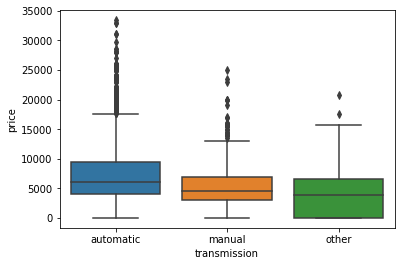

In [76]:
sb.boxplot(x='transmission', y='price', data=df_sedan)

<AxesSubplot:xlabel='transmission', ylabel='price'>

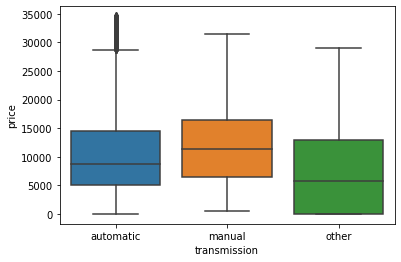

In [77]:
sb.boxplot(x='transmission', y='price', data=df_suv)

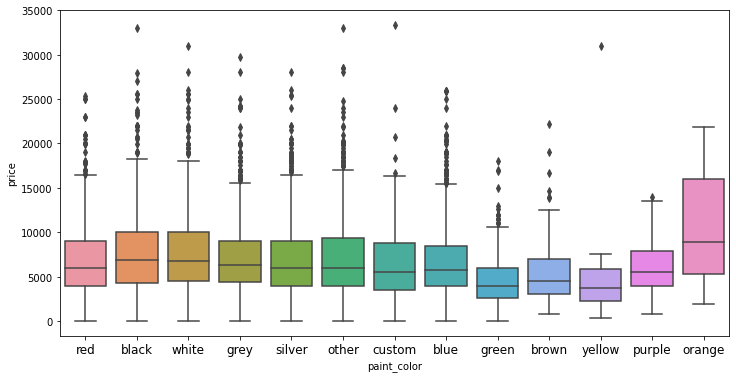

In [78]:
plt.figure(figsize=(12, 6))
sb.boxplot(x='paint_color', y='price', data=df_sedan)
plt.xticks(fontsize=12)
plt.show()

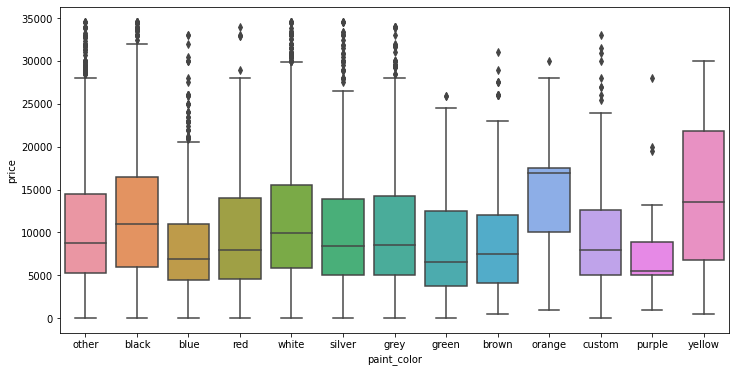

In [79]:
plt.figure(figsize=(12, 6))
sb.boxplot(x='paint_color', y='price', data=df_suv)
plt.show()

Después de analizar los datos, podemos concluir que las variables **transmission** y **paint_color** no tenien relación directa con el precio de los vehículos. Sin embargo esto no quiere decir que no afecte, solamente no es tan significativo su impacto en el precio como lo pueden ser otras variables como la edad y el millaje del vehículo.

## Conclusión general

El objetivo de este proyecto fue estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo. Al comenzar nuestro analisís de l información, nos dimos cuenta que teníamos valores nulos de manera aleatoria, es decir, no habia ninguna relación entre estos datos faltantes, por lo que decidimos tratarlos de la siguiente manera: En las columnas **'model_year' y 'cylinders'** decidimos eliminarlos, ya que no representaban una cantidad significativa para nuestro análisis, en la columna **'odometer'** decidimos rellenar esos valores ausentes con la mediana del conjunto de datos de la misma columna. En la columna **'paint_color'** decidimos crear una categoria nueva **'other'** en representación a otros colores no especificados. En la columna **'is_4wd'** rellenamos los valores nulos con '0' ya que concluimos que al estar estos datos ausentes, significa que no contaban con tracción en las 4 ruedas.

Después, corregimos el tipo de datos, las columnas **'model_year'**, **'cylinders'** y **'is_4wd'** las tratamos para que los datos dentro de estas fueran números enteros. Y en la columna **'date_posted'** tratamos sus valores para tenerlos con tipo **datetime**.

A continuación pasamos a enriquecer los datos para facilitar el análisis. Agregamos valores de fechas (año, mes y día) para ver cuando se colocó cada anuncio.

En la columna **'condition'** creamos categorias para facilitar su trato al convertirlos en valores numéricos y no booleanos **(salvage = 1, fair = 2...) **

Al analizar los datos mas a fondo, nos dimos cuenta que había una cantidad de valores atípicos considerables, por lo que nos dimos a la tarea de tratarlos.

Seguimos con el análisis para determinar el tiempo de duración de los anuncios activos. Con este an+alisis concluimos que un anuncio en promedio dura **1 mes activo** y el tipo de vehículos con mayor cantidad de anuncios activos fueron los **sedan**.

Para concluir, al continuar estudiando los datos, acercandonos al tema del precio de los vehículos, nos dimos cuenta que **la edad del vehículo** es el factor con **mayor relación** al valor del vehículo, seguida del **millaje, condición, cilindraje y trnasmisión**.